# Optimal Portfolio Construction

### Step 1: Import Data from Kenneth French's Data Library

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

matplotlib.style.use('ggplot')

In [2]:
import pandas_datareader as pdr

In [8]:
ff_inds_49 = pdr.get_data_famafrench('49_Industry_Portfolios', '1979-01-01')
rets = ff_inds_49[0] / 100
rets.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1979-01,0.0532,0.0417,-0.0005,0.0663,0.0054,0.0616,0.0498,0.0642,0.0338,0.1042,...,0.0208,0.0382,0.0582,0.0629,0.0672,0.0295,0.0632,0.0593,0.0642,0.0756
1979-02,-0.0427,-0.0398,-0.0414,-0.0389,-0.0300,-0.0732,-0.0585,-0.0333,-0.0522,-0.0299,...,-0.0563,-0.0552,-0.0184,-0.0430,-0.0436,-0.0413,-0.0251,-0.0278,-0.0329,-0.0272
1979-03,0.0698,0.0242,0.0189,0.0801,0.0524,0.0795,0.0687,0.0304,0.0477,0.0948,...,0.0439,0.0967,0.0745,0.0568,0.0902,0.0608,0.0995,0.1352,0.0681,0.0915
1979-04,0.0572,0.0016,-0.0279,0.0224,-0.0021,0.0716,-0.0029,0.0187,0.0078,-0.0037,...,-0.0183,0.0034,-0.0038,0.0066,0.0656,0.0205,0.0018,0.0189,0.0167,0.0229
1979-05,0.0032,-0.0147,-0.0142,-0.0466,-0.0280,0.0031,-0.0369,-0.0258,-0.0270,0.0042,...,-0.0031,0.0095,-0.0128,-0.0286,-0.0360,0.0102,-0.0100,-0.0057,0.0022,-0.0161


In [9]:
rets.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ',
       'Other'],
      dtype='object')

In [14]:
rets.columns = map(str.strip, rets.columns)

In [15]:
n = rets.shape[1]

wgts = np.random.random(n)
wgts /= wgts.sum()

wgts

array([0.03311443, 0.00744139, 0.00139672, 0.00449304, 0.01476704,
       0.01258029, 0.02107142, 0.02100797, 0.03198679, 0.00474226,
       0.03549535, 0.01658009, 0.02948928, 0.00466208, 0.03957124,
       0.03941194, 0.02234255, 0.03212202, 0.01380696, 0.00201608,
       0.03525473, 0.02488815, 0.02868901, 0.03161909, 0.00194532,
       0.01680533, 0.00370065, 0.0333497 , 0.0332865 , 0.01750411,
       0.01959311, 0.01460553, 0.03570124, 0.00912236, 0.01857444,
       0.01583167, 0.00093629, 0.03318508, 0.01749841, 0.03202262,
       0.0293755 , 0.00401028, 0.02988072, 0.00703981, 0.01598759,
       0.00169439, 0.03924238, 0.02644337, 0.03411366])

In [17]:
portrets = (wgts*rets).sum(axis=1)
portrets.head()

Date
1979-01    0.055784
1979-02   -0.040148
1979-03    0.082763
1979-04    0.010260
1979-05   -0.011781
Freq: M, dtype: float64

In [18]:
portrets.describe()

count    496.000000
mean       0.010449
std        0.049197
min       -0.269966
25%       -0.015662
50%        0.015752
75%        0.038523
max        0.193680
dtype: float64

### Step 2: Calculate the mean and variance of a portfolio 

In [19]:
# mean
portrets.mean()

0.010449406627291267

In [21]:
# expected return of a portfolio
(wgts * rets.mean()).sum()

0.010449406627291281

In [22]:
# matrix multiplication
np.dot(wgts, rets.mean())

0.010449406627291281

In [24]:
# variance
portrets.var()

0.002420308296459962

In [23]:
# variance multiplication of portfolio
wgts @ rets.cov() @ wgts

0.002420308296459964

In [25]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(n)
    weights /= sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 12)
    pvols.append(np.sqrt(weights.T @ (rets.cov() @ weights) * 12))

prets = np.array(prets)
pvols = np.array(pvols)

<IPython.core.display.Javascript object>


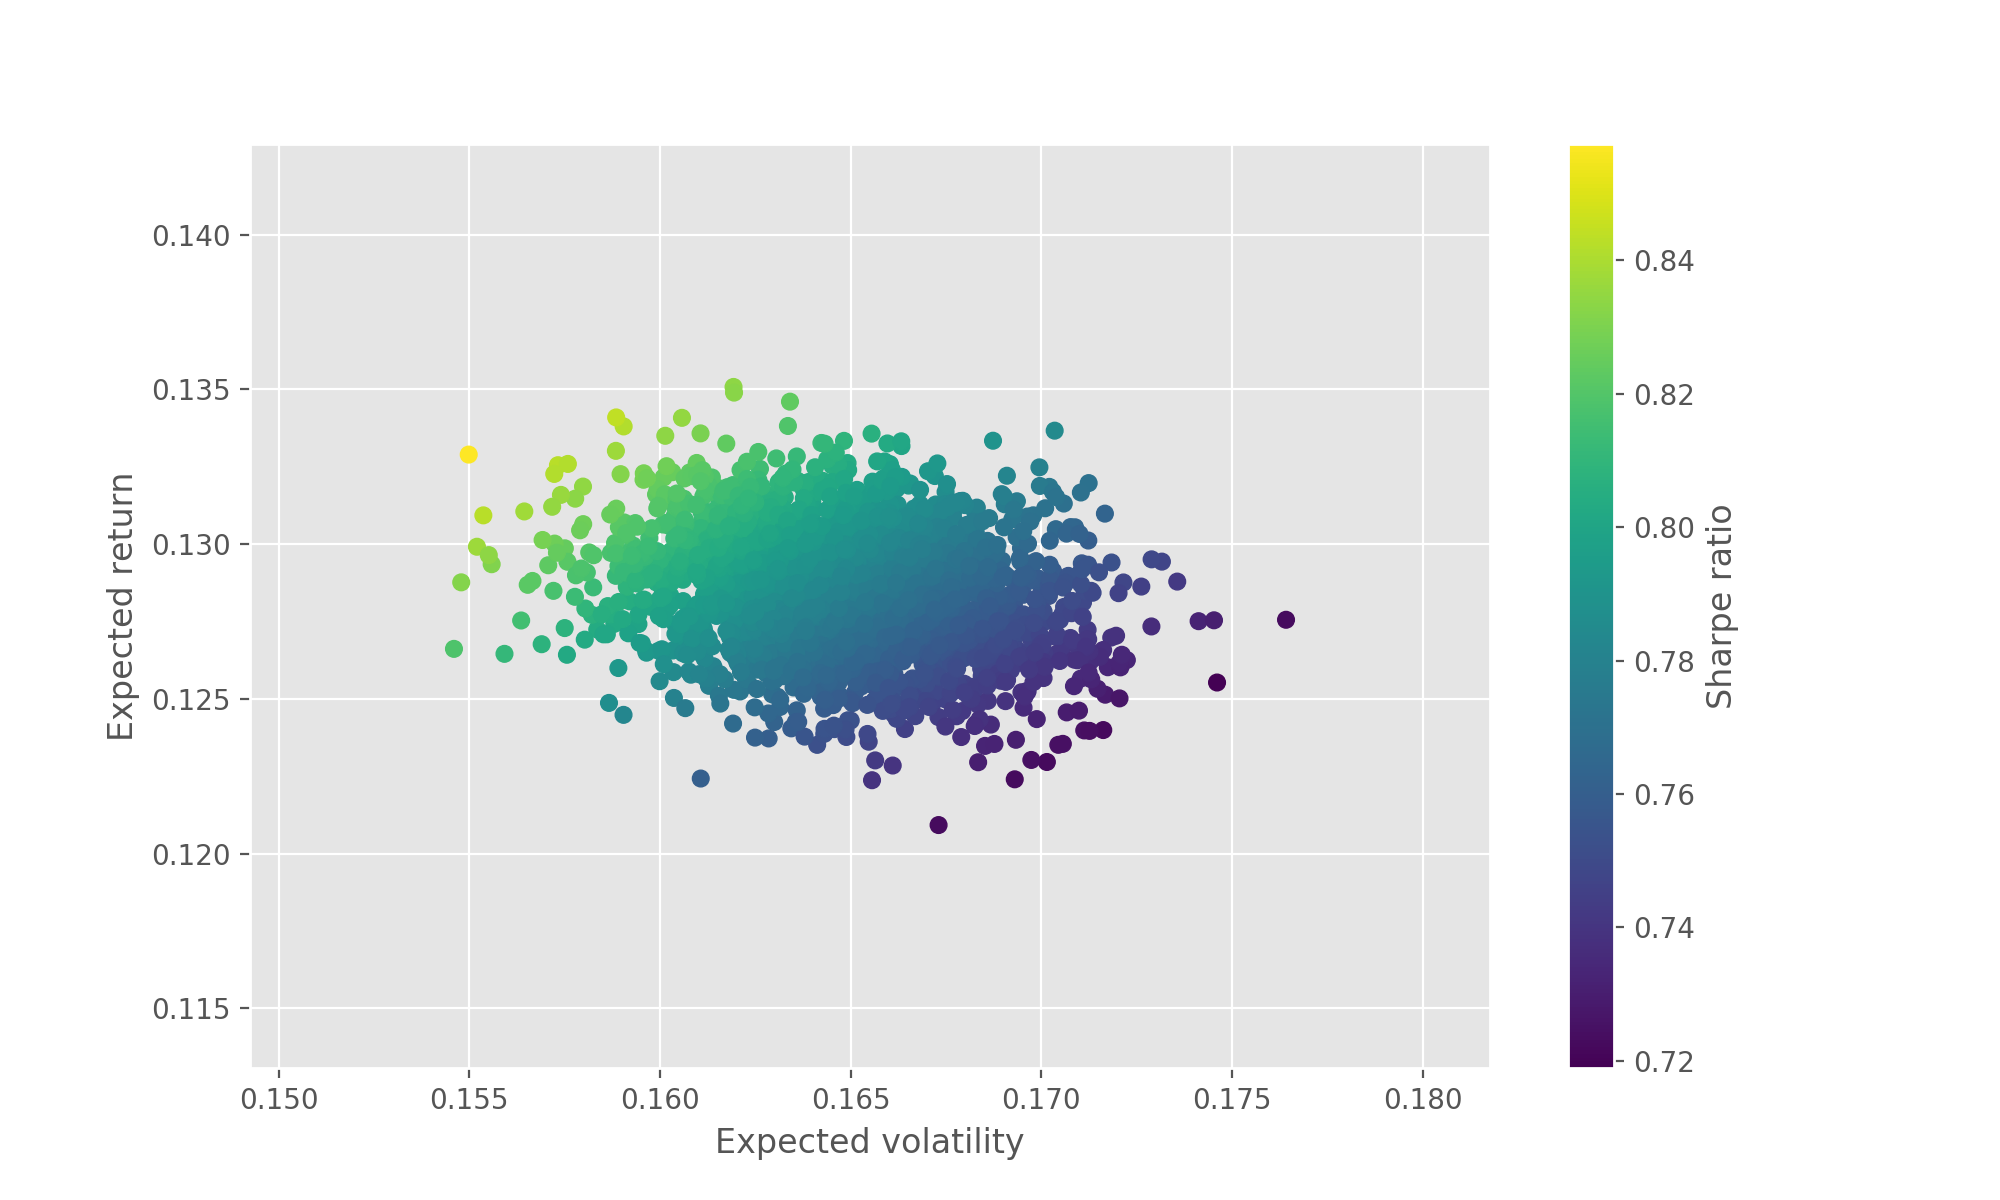

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Step 3: Portfolio Optimization Based on Maximum Sharpe Ratio

find the optimal (maximum) Sharpe ratio through Scipy's optimize function

In [29]:
import scipy.optimize as sco
import scipy.stats

In [27]:
def portfolio(weights):
    ''' Return average annual return, volatility, and Sharpe ratio of a portfolio '''
    pret = rets.mean() @ weights * 12
    pvol = np.sqrt(weights @ rets.cov() @ weights * 12)
    return np.array([pret, pvol, pret/pvol])

In [28]:
portfolio(wgts)

array([0.12539288, 0.17042212, 0.73577819])

In [37]:
# The optimizer minimizes functions, so we'll give it the negative Sharpe ratio to find the maximium
def neg_sharpe(w):
    return -portfolio(w)[2]

#### Scenario 1: For Long Only

In [35]:
# set constraint
cons = {'type': 'eq',
        'fun': lambda w: np.sum(w) - 1}
bnds = tuple((0, 1) for x in range(n)) # specify bounds on the weights must lie between 0 and 1
iwgts = np.repeat(1/n, n) # initial starting weights
portfolio(iwgts)[-1] # Sharpe ratio

0.7819775184492752

In [38]:
# Sequential Least Squares Programming
opts = sco.minimize(fun=neg_sharpe,     # function to minimize
                    x0=iwgts,           # starting point for inputs (weights)
                    method='SLSQP',     # minimization algorithm
                    bounds=bnds,        # bounds on inputs
                    constraints=cons)   # functions that constrain inputs

In [39]:
opts

     fun: -1.1556135155748792
     jac: array([ 2.94176340e-02,  5.33014536e-04,  3.27820331e-02,  5.04851341e-05,
       -9.30577517e-05,  4.61557060e-01,  8.44352692e-02,  4.05801073e-01,
        1.03934079e-01,  1.50403485e-01,  3.56140956e-01,  5.42920679e-02,
        1.60932541e-06,  3.02986041e-01,  2.20069408e-01,  4.40871015e-01,
        4.17555809e-01,  5.24931088e-01,  7.35520244e-01,  5.35484388e-01,
        3.35098952e-01,  2.06092507e-01,  4.26314905e-01,  3.13792467e-01,
        3.74554560e-01, -1.74611807e-04, -1.07681751e-03,  3.23962823e-01,
        7.13686734e-01,  1.71648130e-01,  3.92049551e-05,  5.64482361e-02,
        5.09070531e-01,  2.43167207e-01,  1.90781683e-01, -4.60445881e-05,
        5.86864650e-02,  2.41766304e-01,  2.66964331e-01,  1.05205685e-01,
        2.20912337e-01,  3.04950804e-01, -4.70429659e-05,  1.16910845e-01,
        2.84622476e-01,  1.68984324e-01,  7.30413318e-01,  1.36670575e-01,
        6.92955181e-01])
 message: 'Optimization terminated 

In [40]:
portfolio(opts['x'])[-1]

1.1556135155748792

In [43]:
portfolio(opts['x'])[-1] / portfolio(np.repeat(1/n,n))[-1]
# Sharpe ratio is about 1.477 times than what we get for an equal-weighted portfolio

1.4778091291761872

In [44]:
opt_port = pd.Series(opts['x'].round(4), index=rets.columns)
opt_port.name = 'Industry'

In [46]:
# what industry portfolios are included in the optimized portfolio
opt_port[opt_port>0].sort_values(ascending=False)

Util     0.2625
Beer     0.2082
Drugs    0.1116
Smoke    0.0999
Guns     0.0931
Rtail    0.0809
Food     0.0748
Softw    0.0415
Gold     0.0275
Name: Industry, dtype: float64

<IPython.core.display.Javascript object>


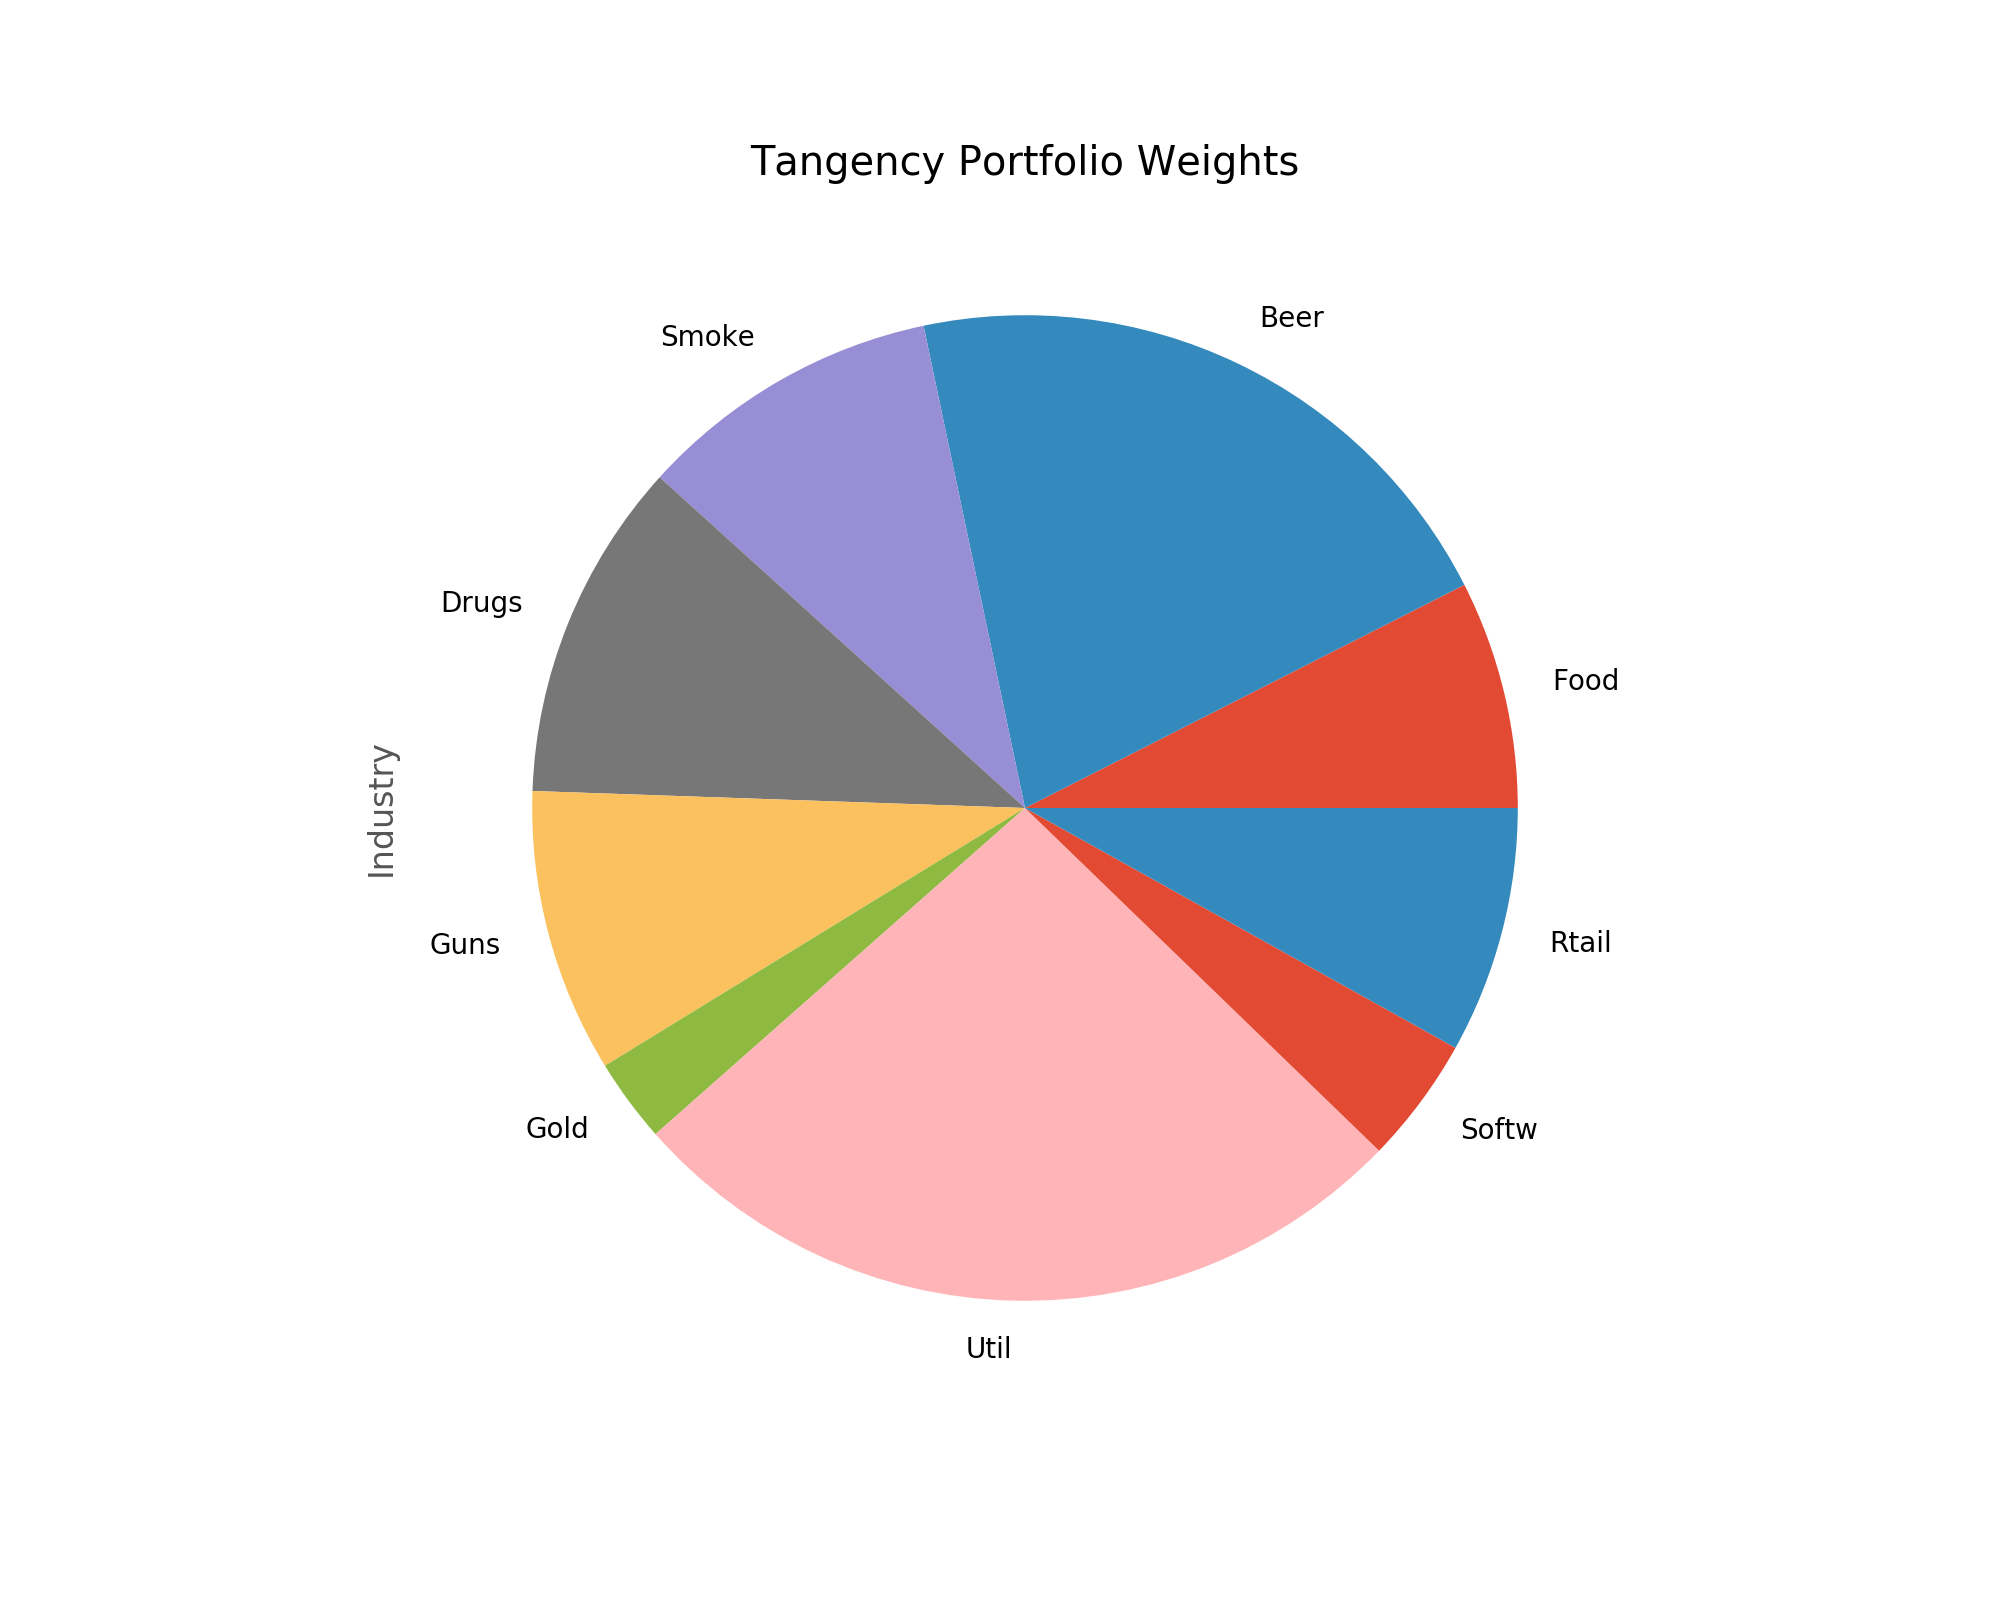

In [52]:
opt_port[opt_port>0].plot(kind='pie', figsize=(10,8), title='Tangency Portfolio Weights');

<IPython.core.display.Javascript object>


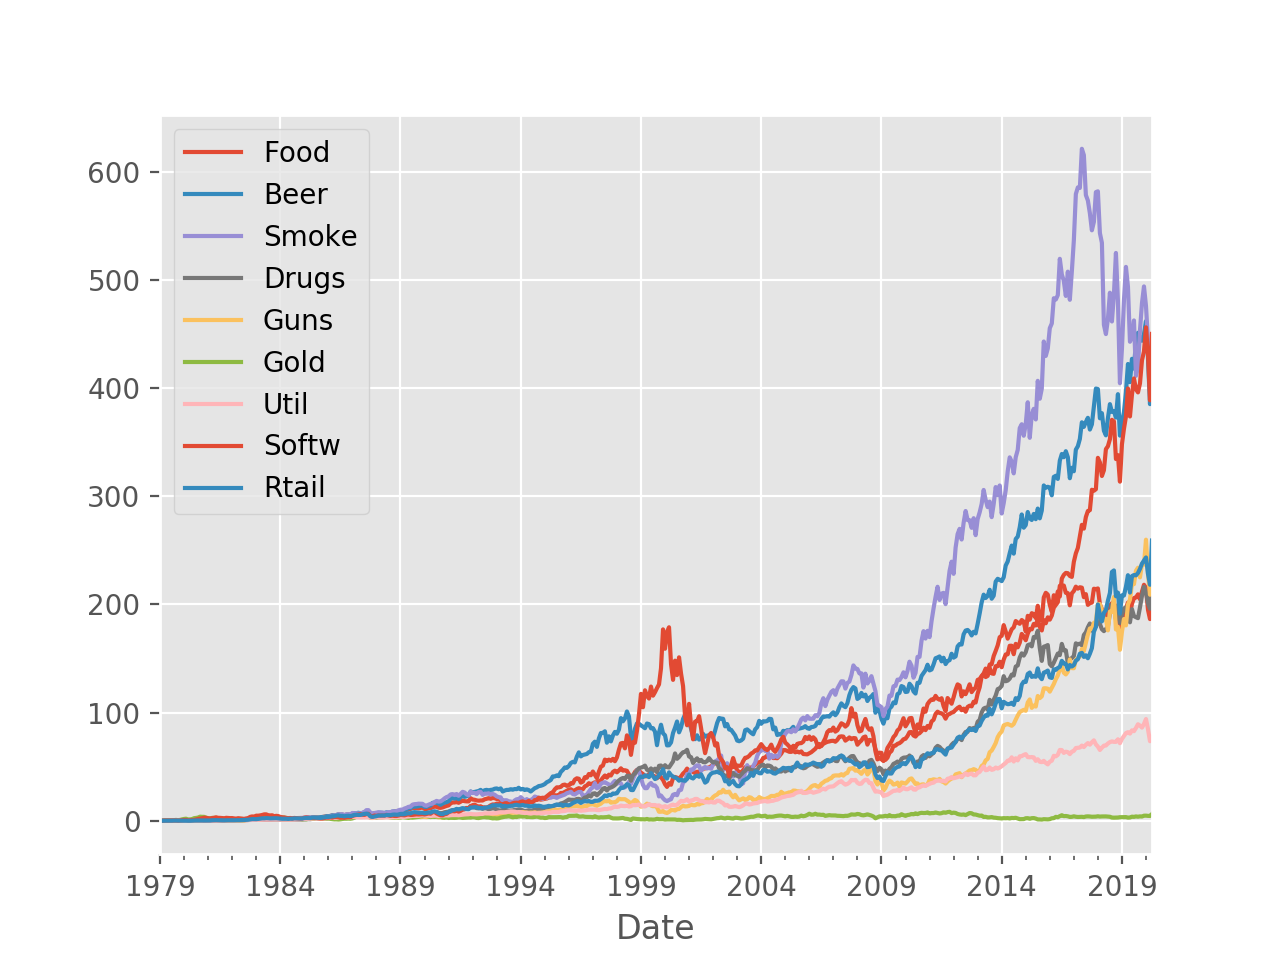

In [53]:
((1+rets[opt_port[opt_port>0].index]).cumprod()-1).plot();

#### Scenario 2: Allow Short Selling 

In [54]:
bnds2 = tuple((-.3, 1.3) for x in range(n))

In [60]:
# Sequential Least Squares Programming
opts2 = sco.minimize(fun=neg_sharpe,     # function to minimize
                     x0=iwgts,           # starting point for inputs (weights)
                     method='SLSQP',     # minimization algorithm
                     bounds=bnds2,        # bounds on inputs
                     constraints=cons)

In [61]:
opts2

     fun: -1.5682355282598053
     jac: array([0.01689129, 0.01661064, 0.01653257, 0.01644182, 0.01718365,
       0.01709099, 0.01689135, 0.01658882, 0.01663621, 0.01690948,
       0.01670577, 0.01664332, 0.01642923, 0.01676053, 0.01676282,
       0.01671107, 0.01668918, 0.01711839, 0.01734252, 0.01722705,
       0.01709661, 0.01676638, 0.01655012, 0.01670186, 0.01677354,
       0.01657419, 0.01762205, 0.01761691, 0.01769842, 0.01700738,
       0.01654264, 0.0165232 , 0.01665947, 0.01693879, 0.01703596,
       0.01721607, 0.01709518, 0.01705457, 0.01668683, 0.0166983 ,
       0.01673624, 0.01680517, 0.01649401, 0.0168009 , 0.01650125,
       0.01634692, 0.01697737, 0.01672789, 0.07181318])
 message: 'Optimization terminated successfully.'
    nfev: 926
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ 0.03862872,  0.04875273,  0.04550223,  0.14300703,  0.13089346,
       -0.18641985,  0.14119457, -0.10346065, -0.03316844,  0.11489182,
       -0.01856399,  0.1557041

In [62]:
opt_port2 = pd.Series(opts2['x'].round(4), index=rets.columns)
opt_port2[opt_port2!=0].sort_values(ascending=False)

Util     0.3878
Fin      0.2319
Guns     0.2107
Trans    0.1908
Chips    0.1821
Rubbr    0.1783
Rtail    0.1669
Softw    0.1606
MedEq    0.1557
Beer     0.1430
Fun      0.1412
Smoke    0.1309
Oil      0.1307
Mines    0.1207
Paper    0.1156
Clths    0.1149
Drugs    0.1104
ElcEq    0.0814
Insur    0.0550
Gold     0.0506
Food     0.0488
Soda     0.0455
Agric    0.0386
Txtls    0.0294
Autos    0.0197
FabPr    0.0125
Boxes    0.0099
Ships    0.0027
LabEq   -0.0102
Telcm   -0.0113
Meals   -0.0115
Hlth    -0.0186
Hshld   -0.0332
Aero    -0.0360
Mach    -0.0576
BldMt   -0.0628
Coal    -0.0664
BusSv   -0.0738
Cnstr   -0.0955
Books   -0.1035
Banks   -0.1093
Hardw   -0.1347
Chems   -0.1468
Whlsl   -0.1563
RlEst   -0.1736
Toys    -0.1864
Steel   -0.2329
PerSv   -0.2460
Other   -0.3000
dtype: float64

### Step 4: Portfolio Optimization Based on Minimum-Variance

In [65]:
def portvar(weights):
    return portfolio(weights)[1]**2

In [66]:
minv = sco.minimize(portvar, 
                    iwgts, 
                    method='SLSQP',
                    bounds=bnds, 
                    constraints=cons)
minv

     fun: 0.013508452798000656
     jac: array([0.02704997, 0.0270709 , 0.02759692, 0.0272751 , 0.0291982 ,
       0.03144399, 0.03362813, 0.03193092, 0.02690087, 0.03051173,
       0.03207703, 0.02803242, 0.02698917, 0.03250551, 0.03123564,
       0.03462388, 0.03591368, 0.03844817, 0.03604573, 0.03016119,
       0.03287024, 0.0345407 , 0.03377147, 0.03424482, 0.03409597,
       0.02715686, 0.02725682, 0.03312851, 0.03855208, 0.0296009 ,
       0.02706532, 0.0268375 , 0.0310408 , 0.03190735, 0.02680645,
       0.03345059, 0.03013752, 0.03306791, 0.02988047, 0.02773825,
       0.02926057, 0.0306132 , 0.0271575 , 0.02875298, 0.03241248,
       0.03121671, 0.03463502, 0.03266663, 0.03377171])
 message: 'Optimization terminated successfully.'
    nfev: 1275
     nit: 25
    njev: 25
  status: 0
 success: True
       x: array([4.46124867e-02, 1.15142738e-01, 0.00000000e+00, 0.00000000e+00,
       3.71678057e-18, 0.00000000e+00, 8.91586880e-18, 0.00000000e+00,
       1.85775273e-01, 0.00000

In [67]:
minv['x'].round(3)

array([0.045, 0.115, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.186,
       0.   , 0.   , 0.   , 0.069, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.019, 0.039,
       0.   , 0.   , 0.   , 0.432, 0.095, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

In [68]:
minv_port = pd.Series(minv['x'].round(4), index=rets.columns)

In [69]:
minv_port[minv_port>0].sort_values(ascending=False)

Util     0.4322
Hshld    0.1858
Food     0.1151
Telcm    0.0952
Drugs    0.0692
Agric    0.0446
Gold     0.0386
Guns     0.0192
dtype: float64

In [70]:
minv_comps = minv_port[minv_port>0].index

In [71]:
rets[minv_comps].corr()

,Agric,Food,Hshld,Drugs,Guns,Gold,Util,Telcm
Agric,1.000000,0.404603,0.394691,0.390805,0.327368,0.135018,0.354660,0.362392
Food,0.404603,1.000000,0.648108,0.634146,0.401758,0.089462,0.520975,0.513615
Hshld,0.394691,0.648108,1.000000,0.643313,0.474549,0.098446,0.430729,0.534568
Drugs,0.390805,0.634146,0.643313,1.000000,0.387022,0.116341,0.435032,0.551173
Guns,0.327368,0.401758,0.474549,0.387022,1.000000,0.239816,0.359588,0.296196
Gold,0.135018,0.089462,0.098446,0.116341,0.239816,1.000000,0.168668,0.107467
Util,0.354660,0.520975,0.430729,0.435032,0.359588,0.168668,1.000000,0.445576
Telcm,0.362392,0.513615,0.534568,0.551173,0.296196,0.107467,0.445576,1.000000


In [72]:
rets[minv_comps].mean().sort_values(ascending=False)

Guns     0.013140
Drugs    0.012071
Food     0.011728
Agric    0.010441
Gold     0.010131
Hshld    0.010089
Telcm    0.009658
Util     0.009598
dtype: float64

In [73]:
rets.mean().sort_values(ascending=False).head(10)

Softw    0.015627
Smoke    0.014361
Fun      0.013843
Beer     0.013535
Guns     0.013140
Rtail    0.012703
Chips    0.012565
ElcEq    0.012391
Fin      0.012235
Clths    0.012152
dtype: float64